In [3]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.DataFrame()

for year in range(2010, 2021):
    for month in range(1, 13):
        if(year==2020 and month==6): break
        dirname = "팀과제/Data/"
        filename = "kto_" + str(year) + str(month).zfill(2) + ".xlsx"
        df_tmp = pd.read_excel(dirname + filename,
                              header=1,
                              usecols="A:G",
                              skipfooter=4)
        df_tmp["year"]=year
        df_tmp["month"]=month
        df_tmp["year_month"]=str(year) + str(month).zfill(2)
        
        if(month==1 or month==2 or month==3): df_tmp["quarter"] = "1Q"
        elif(month==4 or month==5 or month==6): df_tmp["quarter"] = "2Q"
        elif(month==7 or month==8 or month==9): df_tmp["quarter"] = "3Q"
        elif(month==10 or month==11 or month==12): df_tmp["quarter"] = "4Q"

        if(month==12 or month==1 or month==2): df_tmp["weather"] = "winter"
        elif(month==4 or month==5 or month==3): df_tmp["weather"] = "spring"
        elif(month==7 or month==8 or month==6): df_tmp["weather"] = "summer"
        elif(month==10 or month==11 or month==9): df_tmp["weather"] = "fall"

        df = pd.concat([df, df_tmp], ignore_index=True)

china=df[df["국적"]=="중국"]
china['china_normal'] = (china['계'] - china['계'].mean())/china['계'].std()
print(china)

df_sum=df.groupby("year")["관광"].sum()
china_sum=china.groupby("year")["관광"].sum()
ratio = china_sum/df_sum

      국적      관광     상용   공용  유학/연수     기타       계  year  month year_month  \
18    중국   40425  11930   55   2751  36091   91252  2010      1     201001   
85    중국   60590   7907   68  29546  42460  140571  2010      2     201002   
152   중국   50330  13549  174  14924  62480  141457  2010      3     201003   
219   중국   84252  13306  212   2199  47711  147680  2010      4     201004   
286   중국   89056  12325  360   2931  49394  154066  2010      5     201005   
...   ..     ...    ...  ...    ...    ...     ...   ...    ...        ...   
8058  중국  393336   2813   99  10433  75000  481681  2020      1     202001   
8125  중국   49520    715   11  20753  33087  104086  2020      2     202002   
8192  중국    5040    115    2   7388   4050   16595  2020      3     202003   
8259  중국     522     71    0   1112   2230    3935  2020      4     202004   
8326  중국     179     70    2   1189   3684    5124  2020      5     202005   

     quarter weather  china_normal  
18        1Q  winter     -

/var/folders/_x/85c_20bd0yg0yw7bsqgk4qbh0000gp/T/ipykernel_28294/1636375691.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china['china_normal'] = (china['계'] - china['계'].mean())/china['계'].std()


<Axes: xlabel='year_month', ylabel='계'>

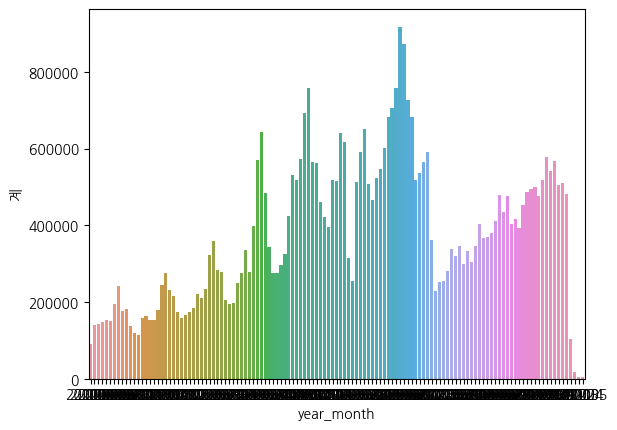

In [8]:
#######
# 연도별 중국의 관광객 수 추이를 분석함 (특정연도인 2016~2017년 사이의 중국 관광객 추이가 현저히 하락함)
######
sns.barplot(china, x=str("year_month"), y="계")


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'china/total ratio')

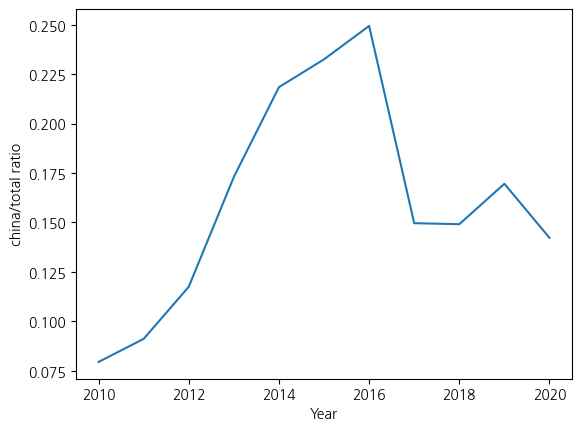

In [7]:
#######
# 한국에 방문한 국가 중 중국에만 이슈가 있는 지 확인하기 위해, 전세계 대비 중국 관광인의 비율을 분석해봄.
# 전세계 대비 중국 관광객 비율을 분석한 결과, 16~17년도 사이의 비율이 현저히 급락함.
# 2017년 3월 주한미군의 사드 배치 진행에 따른 보복의 일환으로 여행사를 통한 한국 관광을 사실상 금지한 것으로 보임.
######
sns.lineplot(ratio)
plt.xlabel("Year")
plt.ylabel("china/total ratio")